# Introduction to Tensorflow

In [13]:
import tensorflow as tf
tf.InteractiveSession()
a = tf.constant(5.0)
b = tf.constant(6.0)
c = a * b
print(c)

Tensor("mul_4:0", shape=(), dtype=float32)


TensorFlow computations define a computation graph that has no numerical value until evaluated!

In [14]:
c.eval()

30.0

In [11]:
a = tf.zeros((2,2))
b = tf.ones((2,2))
c = tf.reduce_sum(b, reduction_indices=1)

<tf.Tensor 'Sum_2:0' shape=(2,) dtype=float32>

## Session
A Session object encapsulates the environment in which Tensor objects are evaluated

In [12]:
with tf.Session() as sess:
    print(sess.run(c))

[2. 2.]


## Tensorflow variables

TensorFlow variables must be initialized before they have values! Contrast with constant tensors.

In [17]:
W1 = tf.ones((2,2))
W2 = tf.Variable(tf.zeros((2,2)), name="weights")

with tf.Session() as sess:
    print(sess.run(W1))  # W1 is a constant, initialization is not needed
    sess.run(tf.global_variables_initializer())
    print(sess.run(W2))

[[1. 1.]
 [1. 1.]]
[[0. 0.]
 [0. 0.]]


Variable objects can be initialized from constants or random values

In [19]:
W = tf.Variable(tf.zeros((1,3)), name="weights")
R = tf.Variable(tf.random_normal((1,3)), name="random_weights")
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(W))
    print(sess.run(R))

[[0. 0. 0.]]
[[ 0.60457146  0.16007867 -1.791986  ]]


In [ ]:
# create the variables
V1 = tf.Variable(tf.zeros((1,3)), name="v1")
V2 = tf.Variable(tf.random_normal((1,3)), name="v2")

# add an op to initialize the variables
init_op = tf.global_variables_initializer()

# add ops to save and restore all the variables.
saver = tf.train.Saver()

# Launch the model, initialize the variables, do some work, save the variables to disk
with tf.Session() as sess:
    sess.run(init_op)
    # do some work with the model
    ..
    # save the variables to the disk
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("model is saved in file : %s" % save_path)

## Restore from the disk

In [ ]:
# create the variables
V1 = tf.Variable(tf.zeros((1,3)), name="v1")
V2 = tf.Variable(tf.random_normal((1,3)), name="v2")

# add an op to initialize the variables
init_op = tf.global_variables_initializer()

# add ops to save and restore all the variables.
saver = tf.train.Saver()

# restore from the disk
with tf.Session() as sess:
    saver.restore(sess, "/tmp/model.ckpt")
    print("model is restored")

## Feed

In [22]:
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)
output = tf.multiply(input1, input2)
# Fetch value of output from computation graph
# Feed data into computation graph by feed_dict
with tf.Session() as sess:
    print(sess.run([output], feed_dict={input1:[7.], input2:[2.]}))    

[array([14.], dtype=float32)]


# TensorBoard

In [2]:
import tensorflow as tf
a = tf.constant(2, name="a")
b = tf.constant(3, name="b")
x = tf.add(a, b)
with tf.Session() as sess:
    # add this line to use TensorBoard.
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(x))
writer.close() # close the writer when you’re done using it

5


In [ ]:
# Go to terminal, run:
# $ tensorboard --logdir="./graphs" --port 6006
# Then open your browser and go to: http://localhost:6006/

# Linear regression in Tensorflow

In [8]:
# Common imports
import tensorflow as tf
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

Case study: $y = 0.3 * x + 0.2$

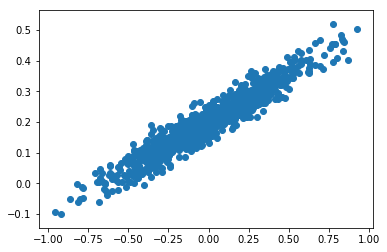

In [3]:
# Define data size
n_samples = 1000

x_data = np.random.normal(0, 0.3, size=n_samples)
y_data = x_data * 0.3 + 0.2 + np.random.normal(0.0, 0.03, size=n_samples)

plt.scatter(x_data, y_data)

In [6]:
# Clears the default graph stack and resets the global default graph.
tf.reset_default_graph()

# Define placeholders for input to Graph
x = tf.placeholder("float")
y = tf.placeholder("float")

# Define variables to be learned
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Add summary ops to collect data, TensorBoard
w_h = tf.summary.histogram("weights", W)
b_h = tf.summary.histogram("biases", b)

# Construct a linear model
y = W * x_data + b

# Mean squared error
with tf.name_scope("loss_function") as scope:
    loss = tf.reduce_mean(tf.square(y - y_data))
    # Create a summary to monitor the loss function, TensorBoard
    tf.summary.scalar("loss", loss)
    
# Merge all summaries into a single operator
merged = tf.summary.merge_all()


Training cost= 0.39474875 Iteration= 0
0.39474875
Training cost= 0.0061104214 Iteration= 50
0.0061104214
Training cost= 0.0016035943 Iteration= 100
0.0016035943
Training cost= 0.0009843666 Iteration= 150
0.0009843666
Optimization Finished!
Training cost= 0.0 W= 0.3154568 b= 0.20075008 



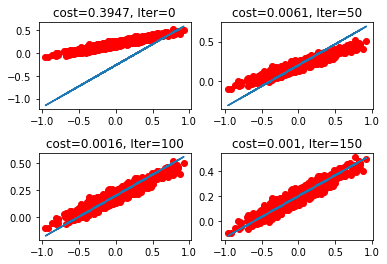

In [41]:
# Gradient descent
# Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    # add this line to use TensorBoard.
    writer = tf.summary.FileWriter('./LinearRegressionExample', sess.graph)
    # Initialize Variables in graph
    sess.run(tf.global_variables_initializer())
    fig, axes = plt.subplots(2, 2)
    axes_list = [item for sublist in axes for item in sublist] 
    index = 0
    for i in range(200):     
        _, cost, summary_str= sess.run([train, loss, merged])
        writer.add_summary(summary_str, i) 
        # Graphic display every 10 steps
        if(i % 50 == 0):
            ax = axes_list.pop(0)
            print("Training cost =", cost, "Iteration =", i)
            print(cost)
            plt.subplots_adjust(hspace = 0.5)
            ax.plot(x_data, y_data, 'ro', label='Original data')
            ax.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Fitted line')
            ax.set_title("cost="+ str(round(cost,4))+", Iter="+str(i))
            
    path = './images/scatteriteration.png'        
    plt.savefig(path, format="png", dpi=300)  
    print("Optimization Finished!")
    training_cost = sess.run(loss, feed_dict={x: x_data, y: y_data})
    print("Training cost =", training_cost, "W =", sess.run(W), "b =", sess.run(b), '\n')
    

## TensorBoard
Go to terminal, run:

$ tensorboard --logdir="./LinearRegressionExample" --port 6006

Then open your browser and go to: http://localhost:6006/

## Real data example: California Housing Prices dataset from the StatLib repository

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [75]:
# drop rows having missing value
housing = housing.dropna()

In [76]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [77]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Intro_To_Tensorflow"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


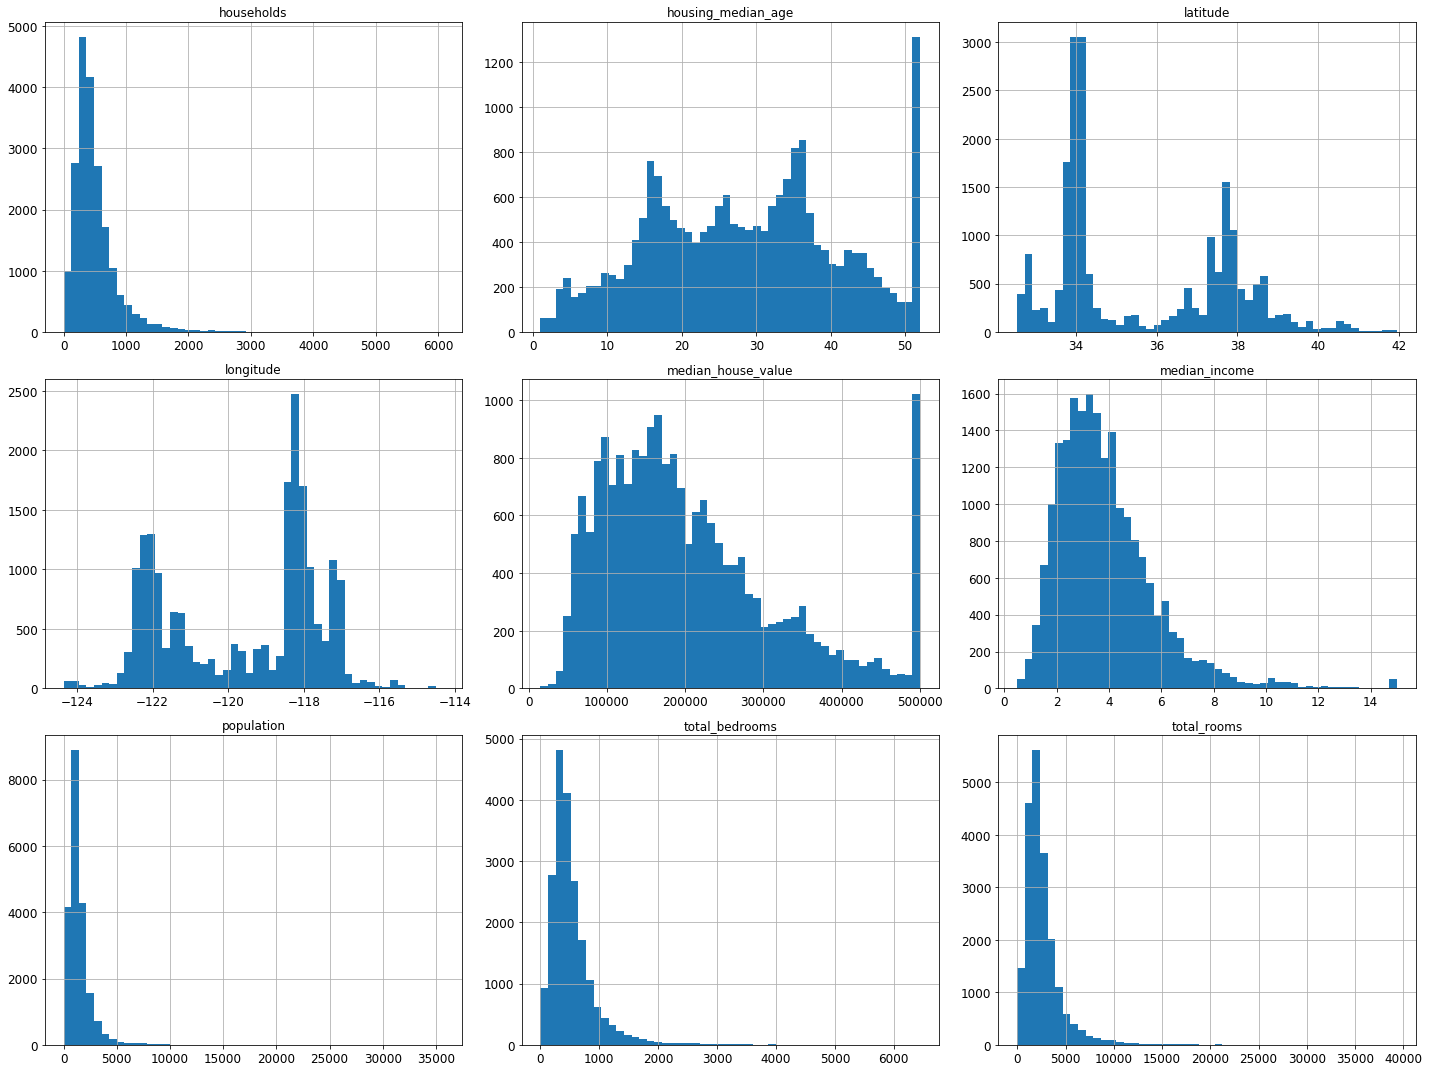

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [78]:
import numpy as np

# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16347 train + 4086 test


In [83]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12307,-116.74,33.62,11.0,2385.0,661.0,682.0,242.0,2.9141,214300.0,INLAND
8204,-118.16,33.78,14.0,1709.0,558.0,1939.0,520.0,1.9808,139100.0,NEAR OCEAN
14802,-117.16,32.58,36.0,1940.0,399.0,1076.0,382.0,3.3906,147800.0,NEAR OCEAN
17351,-120.41,34.88,8.0,3119.0,620.0,1159.0,544.0,3.5288,165500.0,<1H OCEAN
2139,-119.74,36.77,30.0,2427.0,482.0,1375.0,518.0,2.5737,76900.0,INLAND


Saving figure scatter_matrix_plot


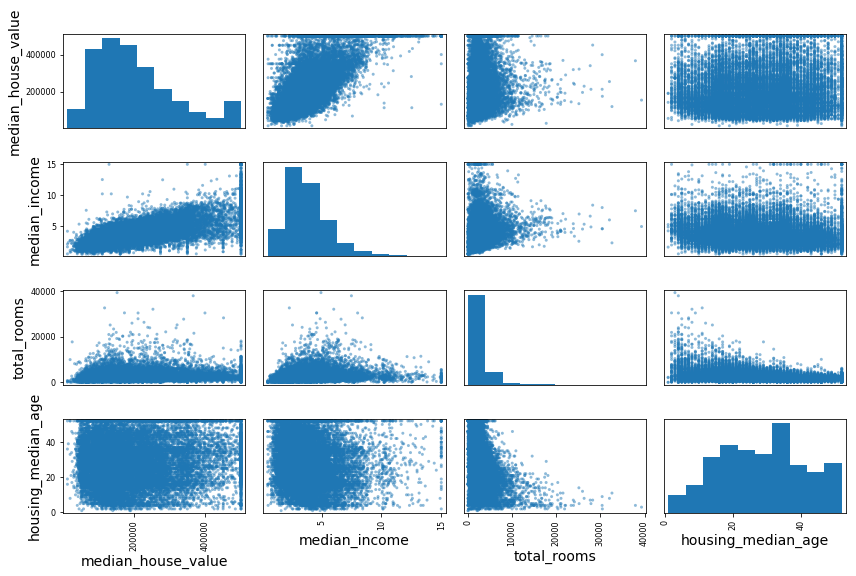

In [67]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

### We are going to build a simple linear regression model, using median_income to predict median_house_value 

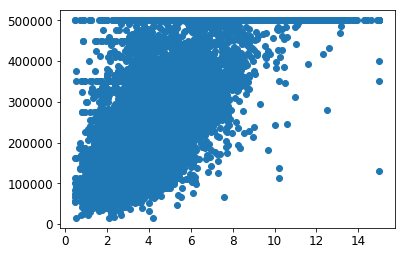

In [120]:
# Define input data
X_data = train_set["median_income"]
y_data = train_set["median_house_value"]
# remove missing data
# Plot input data
plt.scatter(X_data, y_data)

In [108]:
# Define data size and batch size
n_samples = X_data.shape[0]
batch_size = 100

# Parameters
learning_rate = 0.01
display_step = 50


tf.reset_default_graph()
# Define placeholders for input
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32) 

In [109]:
# Define variables to be learned
# Set model weights
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
y_pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
loss = tf.reduce_sum(tf.pow(y_pred - y, 2))/(n_samples)


Optimization Finished!
Training cost= 1218023800000.0 W= 50265.727 b= 21530.09 



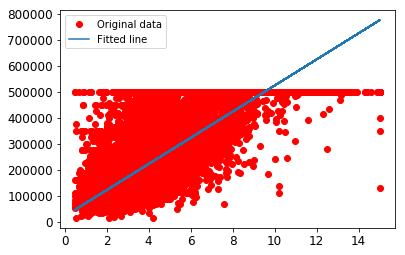

In [116]:
# Sample code to run full gradient descent:
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

with tf.Session() as sess:
    # Initialize Variables in graph
    sess.run(tf.global_variables_initializer())
    # Gradient descent loop for 500 steps
    for _ in range(500):
        # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data.iloc[indices], y_data.iloc[indices]
        # Do gradient descent step
        sess.run([optimizer, loss], feed_dict={X: X_batch, y: y_batch})
        
    print("Optimization Finished!")
    training_cost = sess.run(loss, feed_dict={X: X_data, y: y_data})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(X_data, y_data, 'ro', label='Original data')
    plt.plot(X_data, sess.run(W) * X_data + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
